**Purpose**:

**Advantages:**

**Disadvantages**:

---

# Import Always First

In [ ]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as hpl
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle, islice

# Simulating Cluster Data

In [6]:
dataset, targets = make_blobs(n_samples=200, n_features=2, centers=3, random_state=42)

# Helper Functions

In [15]:
def plot_dataset(dataset, xlim=(-15, 15), ylim=(-15, 15)):
    plt.figure(figsize=(10, 10))
    plt.scatter(dataset[:,0], dataset[:,1], s=150, color="#00B3E9", edgecolor='black', lw=0.8)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [21]:
def plot_clustered_dataset(dataset, y_pred, xlim=(-15, 15), ylim=(-15, 15), neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=(10, 10))
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=150, color=colors[y_pred], zorder=10, edgecolor='black', lw=0.8)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [71]:
def plot_dbscan_grid(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {:.2f} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
            plt.xlim(-14, 15)
            plt.ylim(-12, 15)

            plot_num = plot_num + 1

    plt.show()

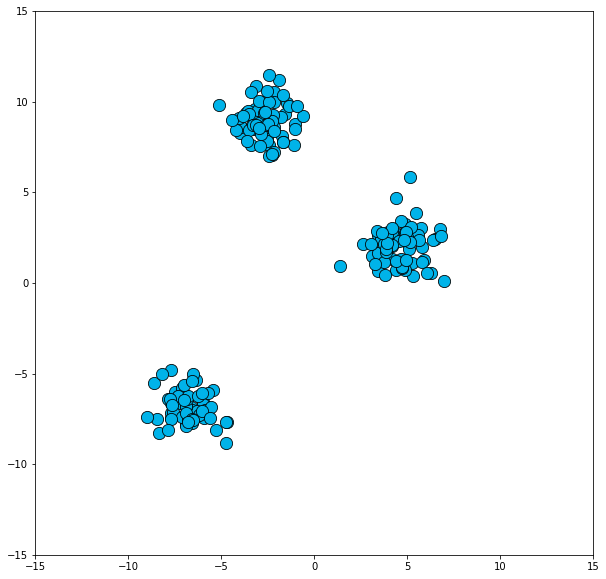

In [22]:
plot_dataset()

# Implementing DBSCAN

In [30]:
model = DBSCAN(eps=2)
pred = model.fit_predict(dataset)

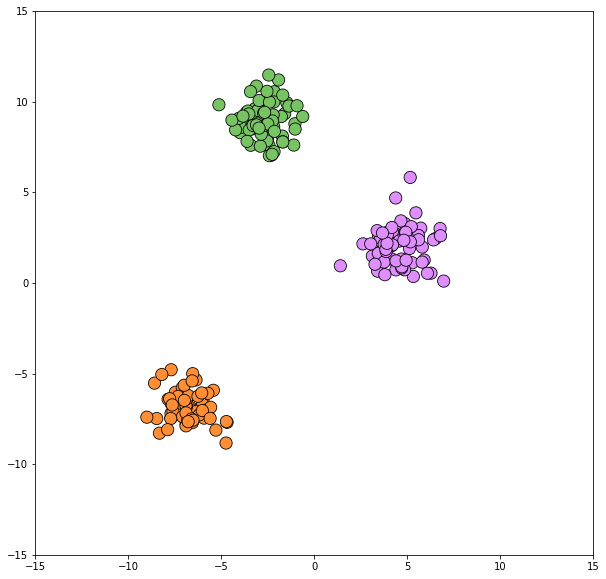

In [31]:
plot_clustered_dataset(dataset, pred)

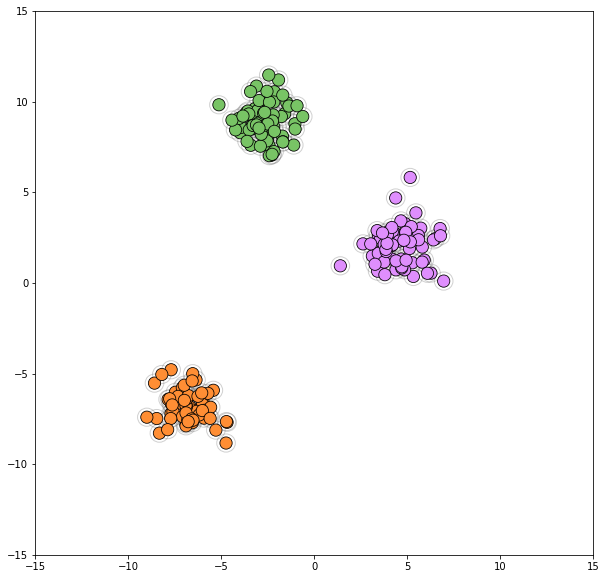

In [32]:
plot_clustered_dataset(dataset, pred, neighborhood=True)

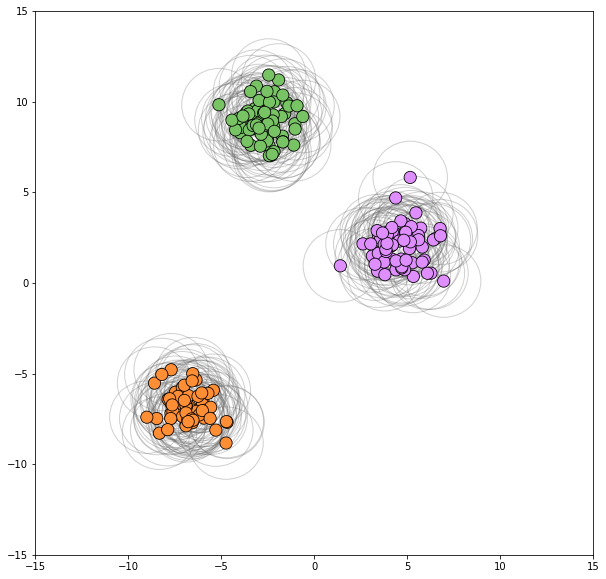

In [33]:
plot_clustered_dataset(dataset, pred, neighborhood=True, epsilon=2)

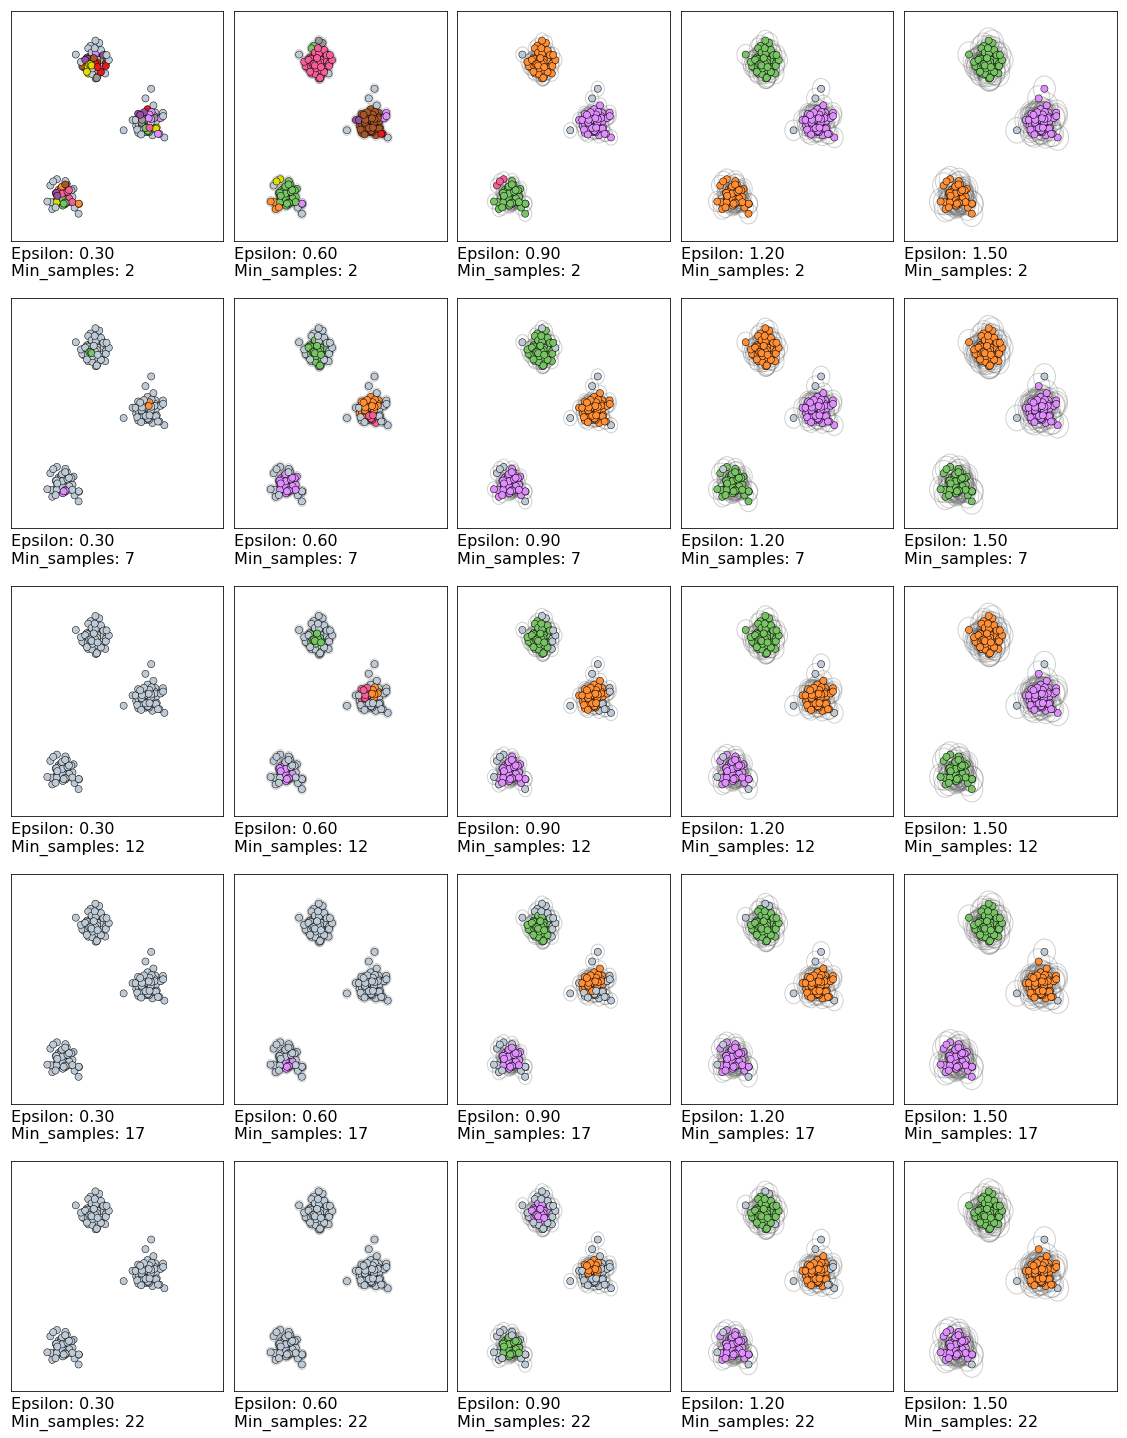

In [72]:
epss = np.arange(0.3, 1.6, .3)
min_samples = np.arange(2, 25, 5)
plot_dbscan_grid(dataset, epss, min_samples)